In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
df = pd.read_excel("C:/Users/Yusuf MUĞLU/Desktop/Pusula_Yusuf_Muğlu/Talent_Academy_Case_DT_2025.xlsx")

In [3]:
df.head(10)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,30 Dakika
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
8,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,15 Dakika


In [4]:
shape=df.shape
print(f"Dataset's shape  {shape[0]} rows and {shape[1]} columns.")
df.info()
df.describe()

Dataset's shape  2235 rows and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


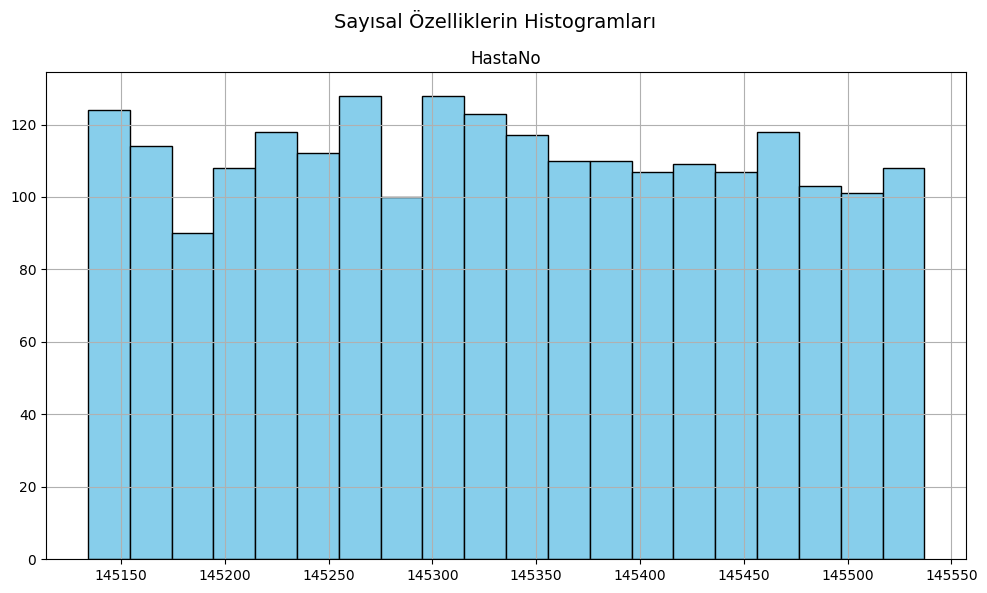

Sayısal kolonlar: ['HastaNo']


In [5]:

# HastaNo ID olduğu için düşürüyoruz
numerical_cols = df.drop(columns=["Yas"]).select_dtypes(include=['int64','float64']).columns.tolist()

# Histogramlar
df[numerical_cols].hist(
    figsize=(10, 6), bins=20,
    color="skyblue", edgecolor="black"
)

plt.suptitle("Sayısal Özelliklerin Histogramları", fontsize=14)
plt.tight_layout()
plt.show()

print("Sayısal kolonlar:", numerical_cols)


In [6]:
print(df.isnull().sum())


HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64


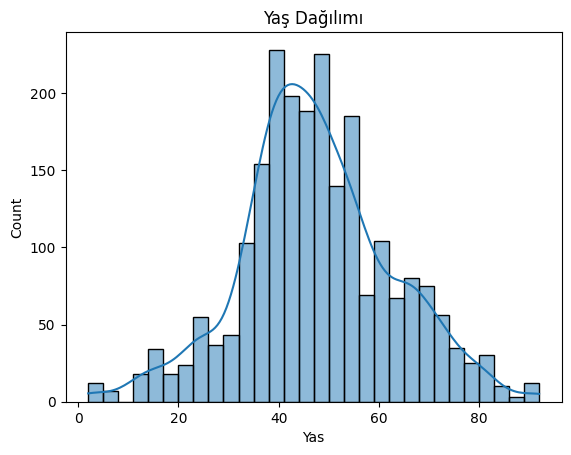

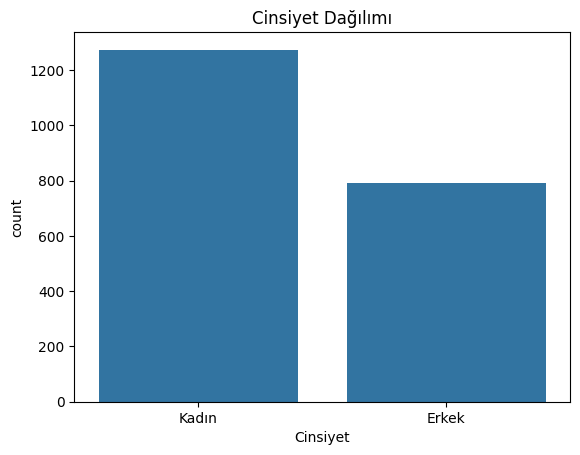

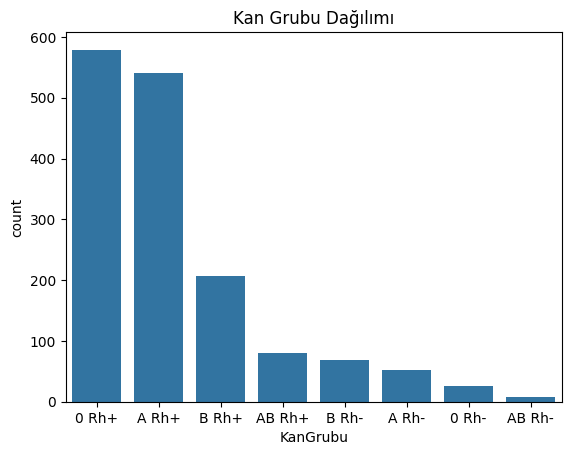

In [7]:
# Yaş dağılımı
sns.histplot(df["Yas"], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.show()

# Cinsiyet dağılımı
sns.countplot(data=df, x="Cinsiyet")
plt.title("Cinsiyet Dağılımı")
plt.show()

# Kan grubu dağılımı
sns.countplot(data=df, x="KanGrubu", order=df["KanGrubu"].value_counts().index)
plt.title("Kan Grubu Dağılımı")
plt.show()


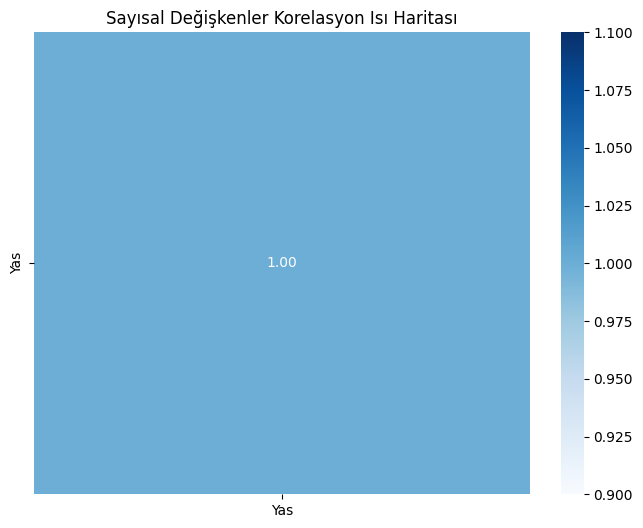

In [8]:
# Sayısal kolonlar
numeric_cols = ["Yas", "TedaviSuresi", "UygulamaSuresi"]

# Korelasyon matrisi
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr(numeric_only=True)  # FutureWarning için numeric_only=True ekledik
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyon Isı Haritası")
plt.show()

In [9]:
# Tedavi süresi (örn: "15 Seans" -> 15)
df["TedaviSuresi_clean"] = df["TedaviSuresi"].str.replace(" Seans", "", regex=False).astype(float)

# Uygulama süresi (örn: "20 Dakika" -> 20)
df["UygulamaSuresi_clean"] = df["UygulamaSuresi"].str.replace(" Dakika", "", regex=False).astype(float)


In [16]:
df["Cinsiyet"].fillna("Bilinmiyor", inplace=True)
df["KanGrubu"].fillna("Bilinmiyor", inplace=True)
df["KronikHastalik"].fillna("Yok", inplace=True)
df["Bolum"].fillna("Bilinmiyor", inplace=True)
df["Alerji"].fillna("Yok", inplace=True)
df["Tanilar"].fillna("Bilinmiyor", inplace=True)
df["UygulamaYerleri"].fillna("Bilinmiyor", inplace=True)


In [11]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_clean,UygulamaSuresi_clean
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,5.0,20.0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,15.0,20.0
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,15.0,20.0
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika,15.0,5.0
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,15.0,20.0


In [12]:
df["KronikHastalik_Sayi"] = df["KronikHastalik"].apply(lambda x: len(str(x).split(",")) if x != "Yok" else 0)
df["Alerji_Sayi"] = df["Alerji"].apply(lambda x: len(str(x).split(",")) if x != "Yok" else 0)
df["Tani_Sayi"] = df["Tanilar"].apply(lambda x: len(str(x).split(",")) if x != "Bilinmiyor" else 0)
df["UygulamaYer_Sayi"] = df["UygulamaYerleri"].apply(lambda x: len(str(x).split(",")) if x != "Bilinmiyor" else 0)


In [13]:
categorical_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum"]

le = LabelEncoder()
for col in categorical_cols:
    df[col + "_enc"] = le.fit_transform(df[col])


In [32]:
df.head(10)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,...,TedaviSuresi_clean,UygulamaSuresi_clean,KronikHastalik_Sayi,Alerji_Sayi,Tani_Sayi,UygulamaYer_Sayi,Cinsiyet_enc,KanGrubu_enc,Uyruk_enc,Bolum_enc
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,...,5.0,20.0,3,1,1,1,2,0,4,1
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,15.0,20.0,4,0,4,1,1,0,4,1
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,15.0,20.0,4,0,4,2,1,0,4,1
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,15.0,5.0,4,0,4,1,1,0,4,1
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,15.0,20.0,4,0,4,2,1,0,4,1
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,15.0,20.0,4,0,4,1,1,0,4,1
6,145136,60,Erkek,0 Rh+,Türkiye,Yok,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,10.0,30.0,0,2,1,0,1,0,4,1
7,145136,60,Erkek,0 Rh+,Türkiye,Yok,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,10.0,20.0,0,2,1,0,1,0,4,1
8,145136,60,Erkek,0 Rh+,Türkiye,Yok,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,10.0,20.0,0,2,1,0,1,0,4,1
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,...,15.0,15.0,4,1,3,1,2,0,4,1


In [14]:
final_cols = [
    "Yas",
    "TedaviSuresi_clean",
    "UygulamaSuresi_clean",
    "KronikHastalik_Sayi",
    "Alerji_Sayi",
    "Tani_Sayi",
    "UygulamaYer_Sayi",
    "Cinsiyet_enc",
    "KanGrubu_enc",
    "Uyruk_enc",
    "Bolum_enc"
]

final_df = df[final_cols].copy()
print(final_df.head())


   Yas  TedaviSuresi_clean  UygulamaSuresi_clean  KronikHastalik_Sayi  \
0   60                 5.0                  20.0                    3   
1   28                15.0                  20.0                    4   
2   28                15.0                  20.0                    4   
3   28                15.0                   5.0                    4   
4   28                15.0                  20.0                    4   

   Alerji_Sayi  Tani_Sayi  UygulamaYer_Sayi  Cinsiyet_enc  KanGrubu_enc  \
0            1          1                 1             2             0   
1            0          4                 1             1             0   
2            0          4                 2             1             0   
3            0          4                 1             1             0   
4            0          4                 2             1             0   

   Uyruk_enc  Bolum_enc  
0          4          1  
1          4          1  
2          4          1  
3     

In [15]:
final_df.to_excel("final_dataset.xlsx", index=False)